# Visualizations

In [146]:
# Automatic File Naming Utility
from output_util import OutputUtil

outputUtil = OutputUtil()

# Visualization API

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

expenses_features = [
    "General Government Services",
    "Protective Services",
    "Transportation Services",
    "Environmental Health Services",
    "Public Health Services",
    "Environmental Development Services",
    "Recreation And Cultural Services",
]

revenue_features = [
    "Net property taxes and payments in lieu of taxes",
    "Grants In Lieu Of Taxes",
    "Services Provided To Other Governments",
    "Sales Of Services",
    "Other Revenue From Own Sources",
    "Unconditional Transfers From Other Governments",
    "Conditional transfers from other governments",
]


## Heatmap

In [148]:
def vis_corr_heatmap(df: pd.DataFrame):
    corr = df.select_dtypes(['int64', 'float64']).corr()
    sns.heatmap(corr)

## Pie Charts

In [149]:
def pie_exp_or_rev_breakdown_pie_over_years(df: pd.DataFrame, feature_type: str):
    if feature_type == 'expenses':
        features = expenses_features
    elif feature_type == 'revenues':
        features = revenue_features
    else:
        return

    yearly_feature = df.groupby(["Year"])[features].sum()

    # Plot pie charts for each year's expenses
    for i in range(len(yearly_feature)):
        yearly_feature.iloc[i].plot.pie(subplots=True, autopct='%1.1f%%')
        plt.title(f'Year {yearly_feature.index[i]} {feature_type}')
        plt.show()


def pie_feature_breakdown_pie_over_counties_over_years(df: pd.DataFrame, feature: str):
    yearly_feature = df.groupby(["Year", "Region"])[feature].sum().unstack()

    # Plot pie charts for each year's feature breakdown per county
    for year in yearly_feature.index:
        yearly_data = yearly_feature.loc[year]
        yearly_data.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(8, 6))
        plt.title(f'{feature} breakdown per county for year {year}')
        plt.ylabel('')
        plt.show()


def pie_feature_breakdown_pie_over_pop_size_over_years(df: pd.DataFrame, feature: str):
    yearly_feature = df.groupby(["Year", "Population Size"])[feature].sum().unstack()

    # Plot pie charts for each year's feature breakdown per county
    for year in yearly_feature.index:
        yearly_data = yearly_feature.loc[year]
        yearly_data.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(8, 6))
        plt.title(f'{feature} breakdown per county for year {year}')
        plt.ylabel('')
        plt.show()

## Stacked Bar Charts

In [150]:
def vis_expenses_breakdown_as_barchart(df: pd.DataFrame, feature_type: str):
    if feature_type == 'expenses':
        features = expenses_features
    elif feature_type == 'revenues':
        features = revenue_features
    else:
        return

    # Group by year and sum the features
    yearly_feature = df.groupby(["Year"])[features].sum()

    # Plot
    fig, ax = plt.subplots()

    # Bottom offset for each bar
    bottom_offset = np.zeros(len(yearly_feature))

    for feature in features:
        # Calculate proportion of each feature per year
        proportion = yearly_feature[feature] / yearly_feature.sum(axis=1)
        
        # Plot stacked bars
        bars = ax.bar(yearly_feature.index, proportion, bottom=bottom_offset, label=feature)

        # Update bottom offset
        bottom_offset += proportion
        
        # Adding percentage annotations within each segment
        for bar in bars:
            height = bar.get_height()
            if height > 0.05:  # Only add annotations if the segment is large enough to fit the text
                ax.annotate(f'{height:.0%}',  # Format the label as a percentage
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

    ax.set_ylabel('Proportions')
    ax.set_title(f'Yearly {feature_type} breakdown as stacked bar chart')
    
    # Explicitly set x-axis ticks to ensure every year is shown
    ax.set_xticks(yearly_feature.index)
    ax.set_xticklabels(yearly_feature.index, rotation=45)  # Rotate labels to avoid overlap

    # Move the legend outside the plot
    ax.legend(title='Categories', loc='upper left', bbox_to_anchor=(1, 1))
    
    #plt.tight_layout()  # Adjust layout
    plt.show()


In [151]:
def vis_against_population_size_over_years(df: pd.DataFrame, feature: str):
    total_feature = df.groupby(["Population Size", "Year"])[feature].sum()
    total_feature = total_feature.unstack(level=0).sort_index(axis=1)
    total_feature.plot(kind='bar')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title(feature + ' by Population Size and Year')
    plt.legend(title='Population Size')

    plt.tight_layout()
    plt.show()


def vis_against_years_over_population_size(df: pd.DataFrame, feature: str):
    total_feature = df.groupby(["Year", "Population Size"])[feature].sum()

    total_feature.unstack(level=0).plot(kind='bar')
    plt.xlabel('Population Size')
    plt.ylabel(feature)
    plt.title(feature + ' by Population Size and Year')
    plt.legend(title='Years')

    plt.tight_layout()
    plt.show()


def vis_feature_total_over_years(df: pd.DataFrame, features):
    for feature in features:
        total_feature = df.groupby(["Year"])[feature].sum()
        total_feature.plot()

    plt.xlabel('Year')
    plt.ylabel("Total")
    plt.title('Feature totals of NS over years')
    plt.legend(title='Feature')

    plt.tight_layout()
    plt.show()


def vis_feature_x_vs_feature_y(df: pd.DataFrame, feature_x: str, feature_y: str):
    if (feature_x not in df) or (feature_y not in df):
        print('Feature not found')
        return None
    df = df.sort_values(by=feature_x)

    plt.plot(df[feature_x], df[feature_y])
    plt.plot()


def vis_pop_vs_feature_per_capita(df: pd.DataFrame, feature: str):
    x = df["Population"]
    y = df[feature + "_per_capita"]
    plt.scatter(x, y)
    plt.show()


def vis_pop_density_vs_feature_per_capita(df: pd.DataFrame, feature: str):
    x = df["Population Density"]
    y = df[feature + "_per_capita"]
    plt.scatter(x, y)
    plt.show()


# Data Frame

In [152]:
from globals import BINNING_OUTPUT_PATH

binned_df = pd.read_csv(BINNING_OUTPUT_PATH)

# Heatmap

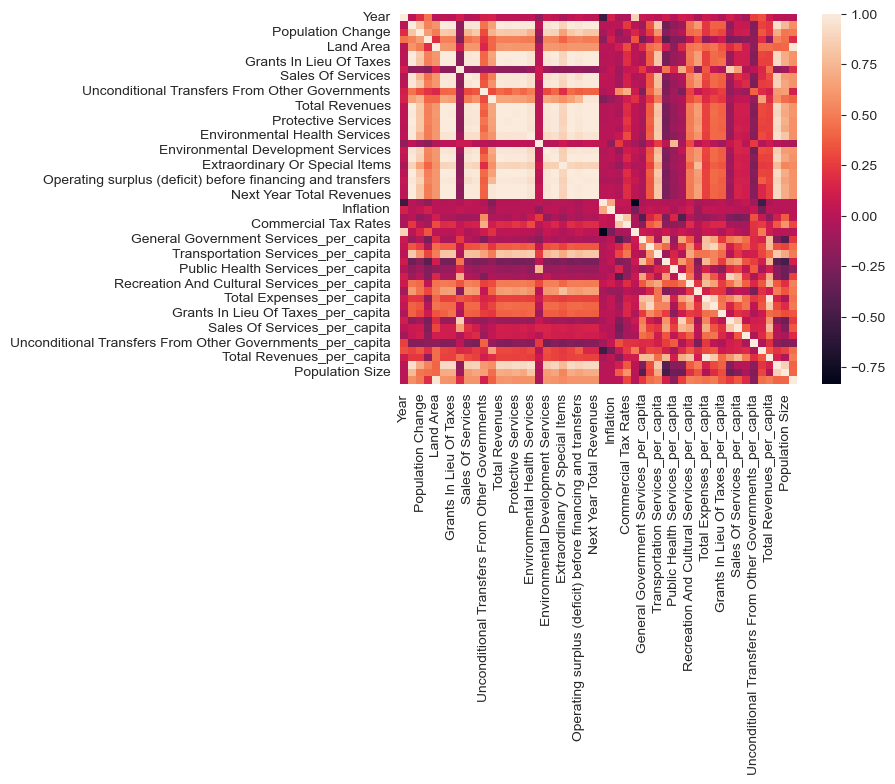

In [153]:
vis_corr_heatmap(binned_df)

# Playground

## Pie chart breakdown of feature over years

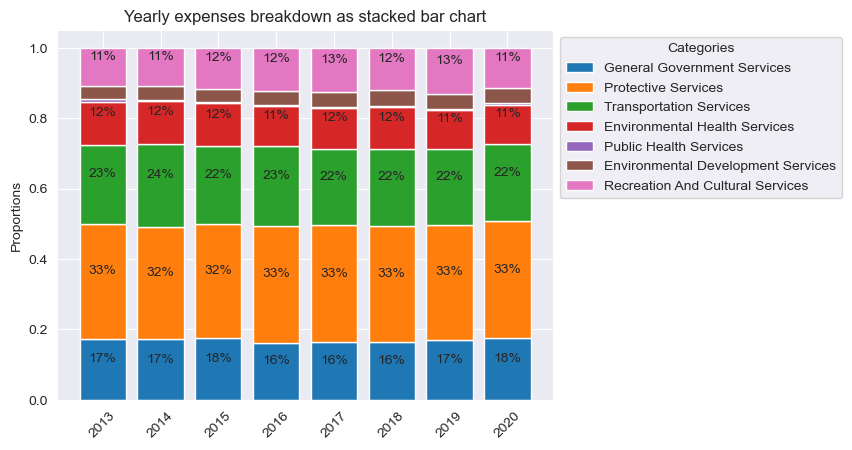

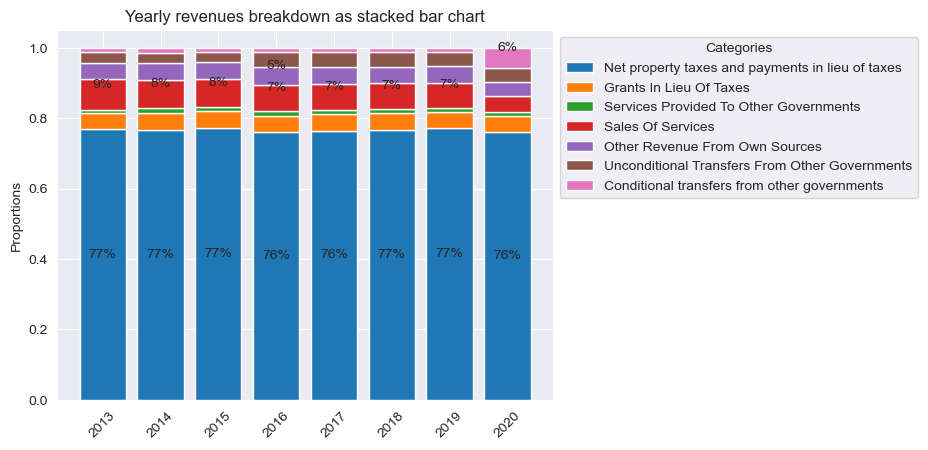

In [154]:
# pie_exp_or_rev_breakdown_pie_over_years(binned_df, 'revenues')
# pie_exp_or_rev_breakdown_pie_over_years(binned_df, 'expenses')
vis_expenses_breakdown_as_barchart(binned_df, 'expenses')
vis_expenses_breakdown_as_barchart(binned_df, 'revenues')

# Pie chart breakdown of feature for each county

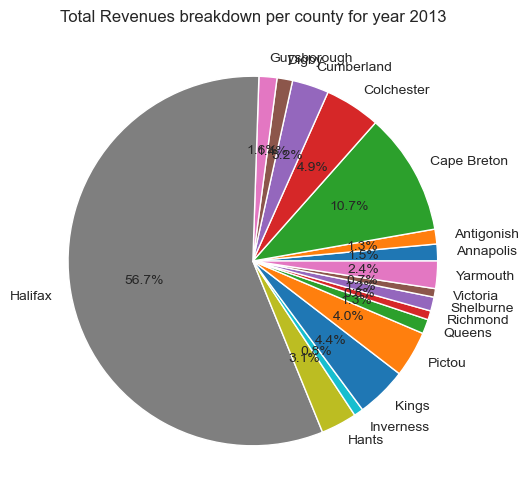

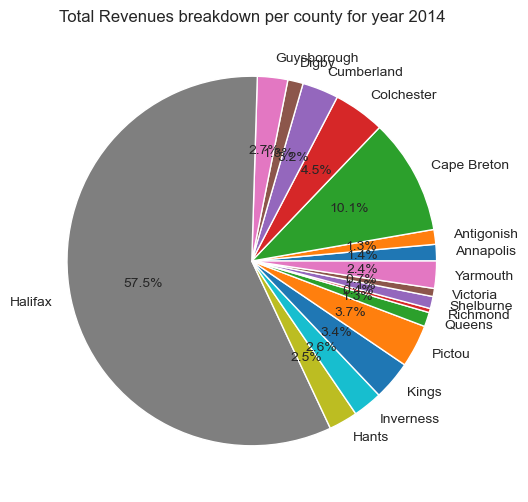

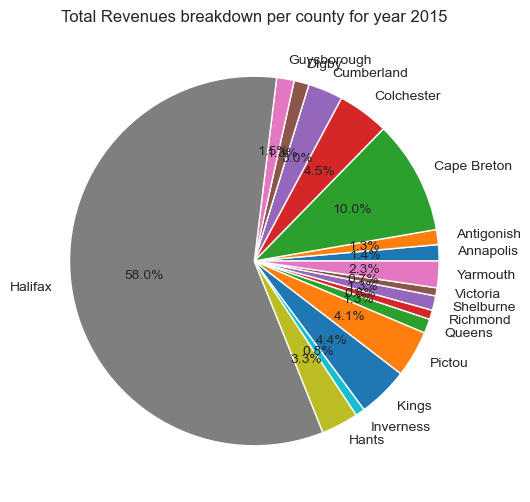

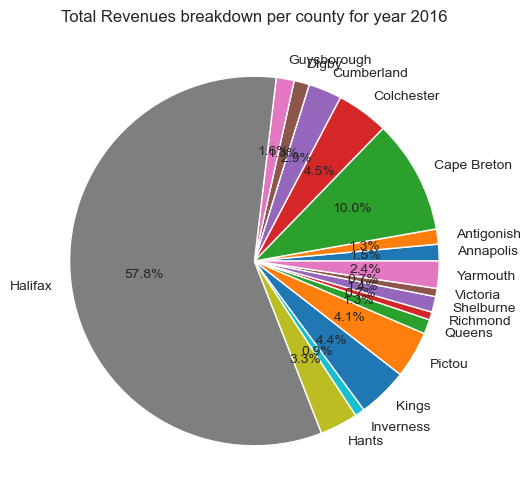

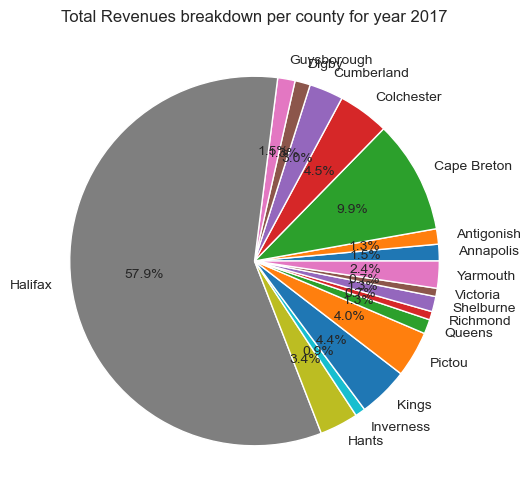

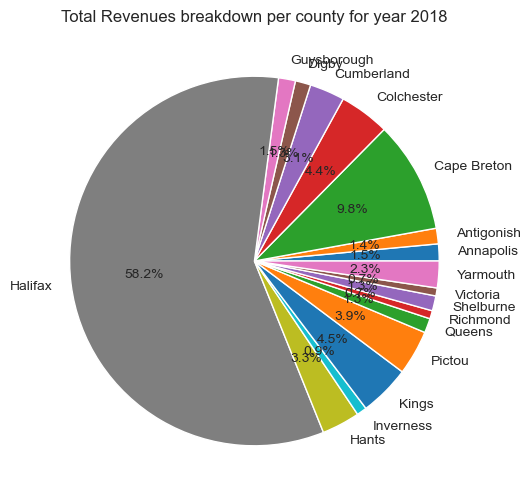

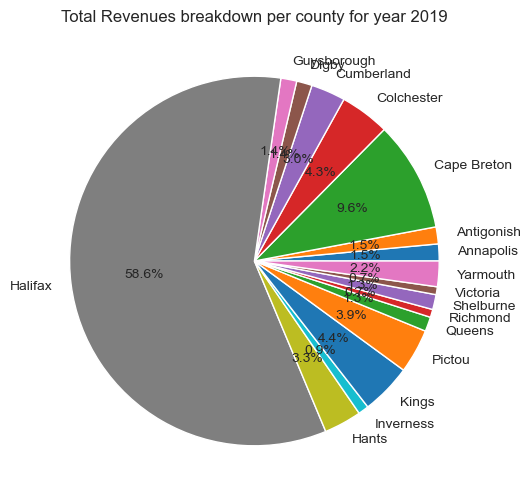

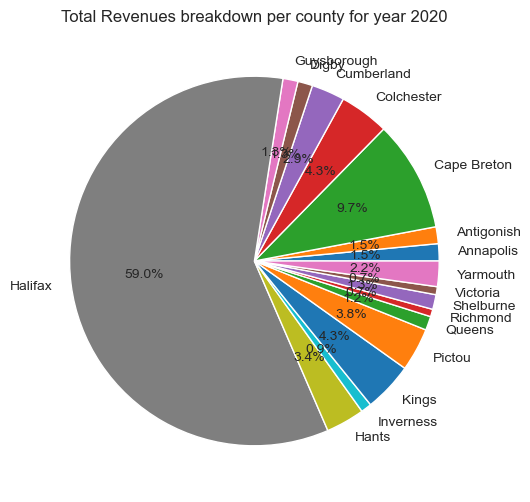

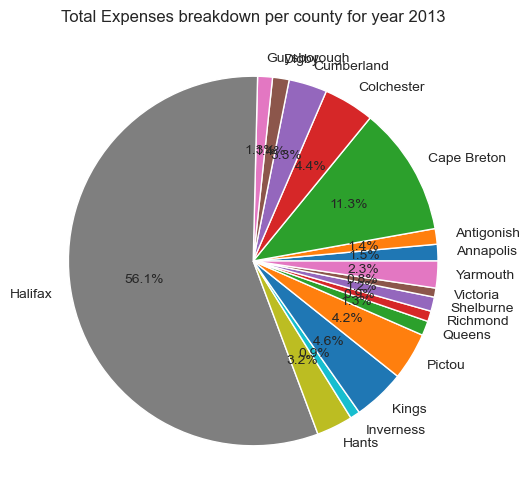

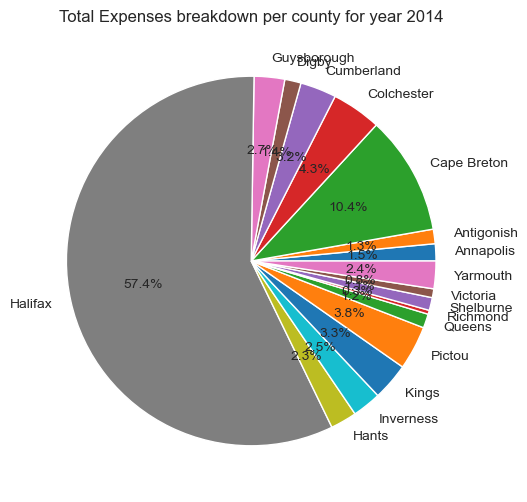

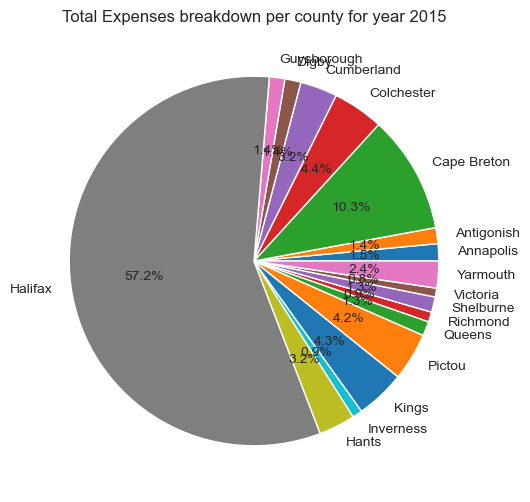

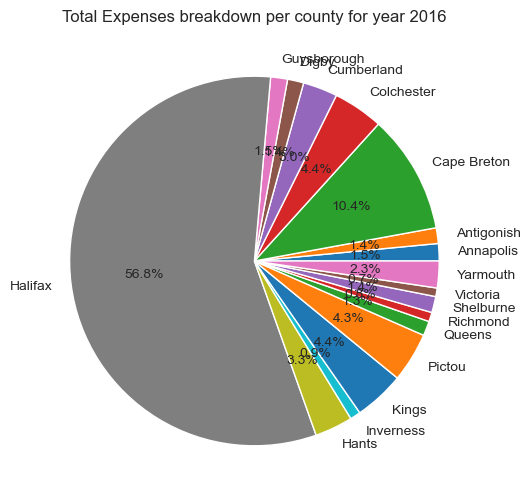

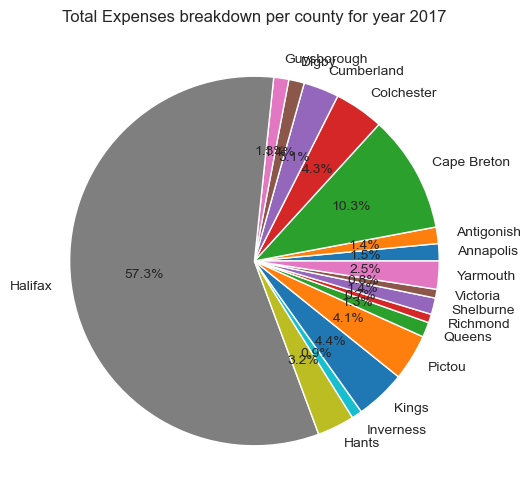

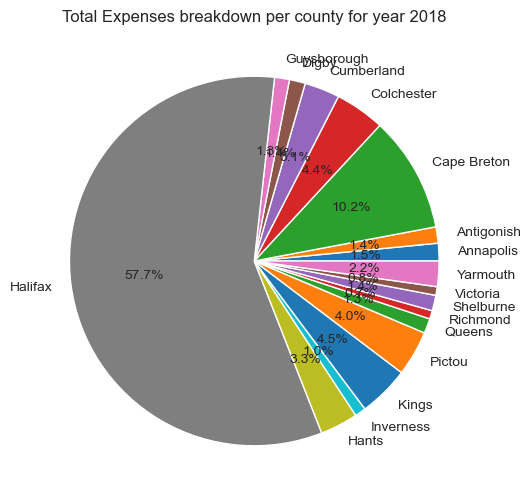

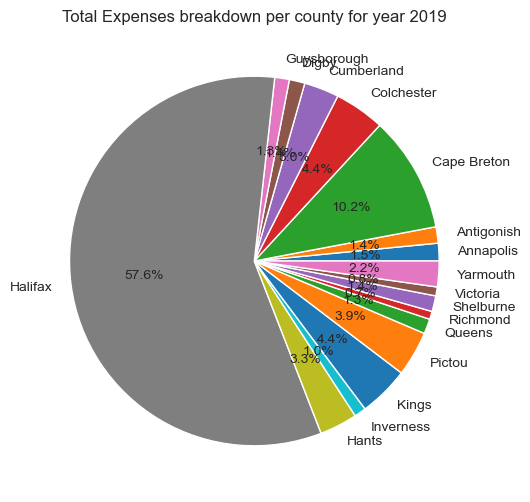

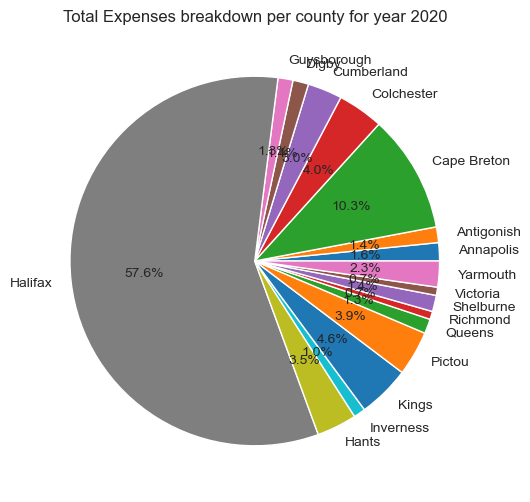

In [155]:
pie_feature_breakdown_pie_over_counties_over_years(df=binned_df, feature="Total Revenues")
pie_feature_breakdown_pie_over_counties_over_years(df=binned_df, feature="Total Expenses")

# Pie chart breakdown of feature for each Population Size


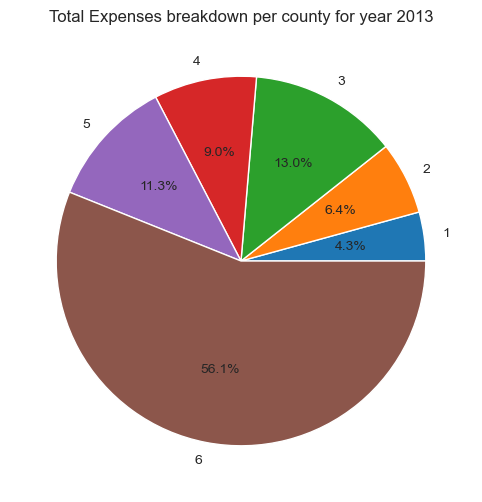

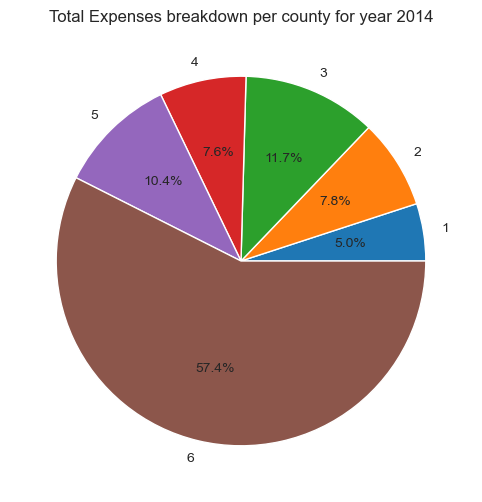

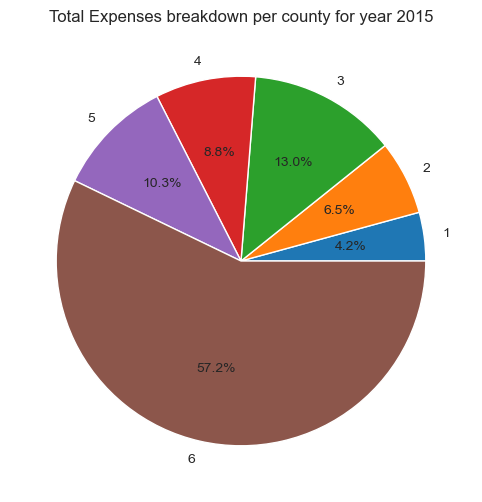

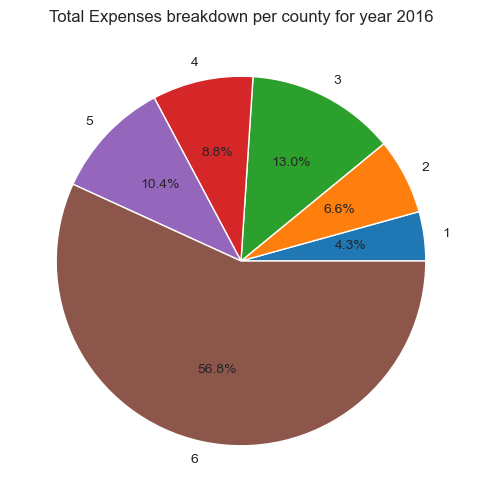

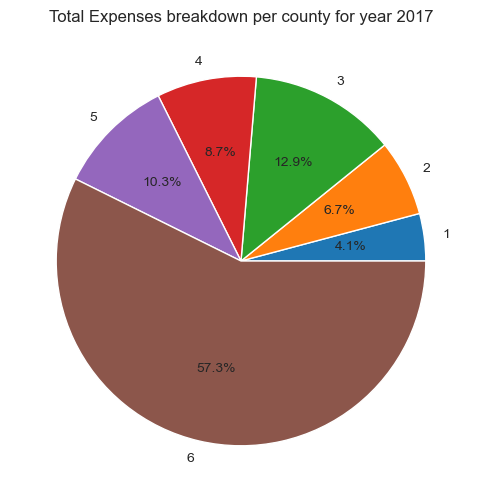

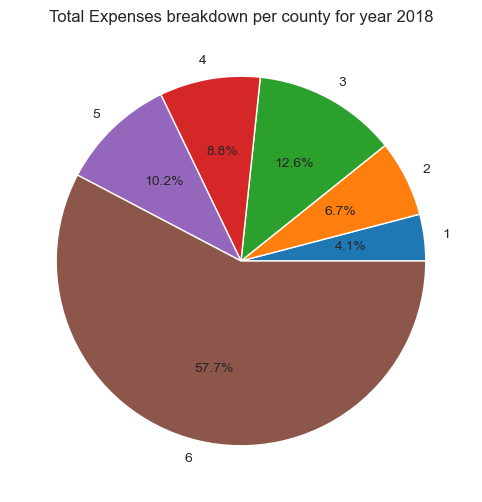

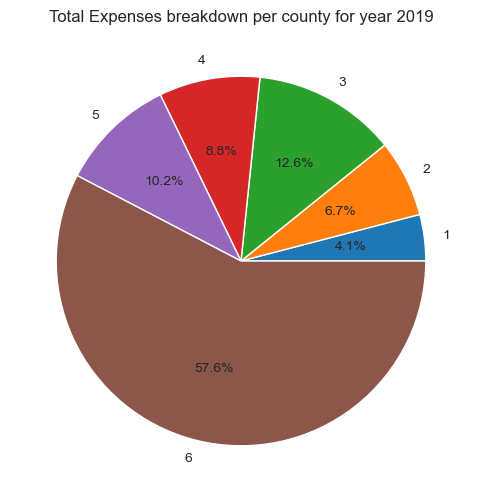

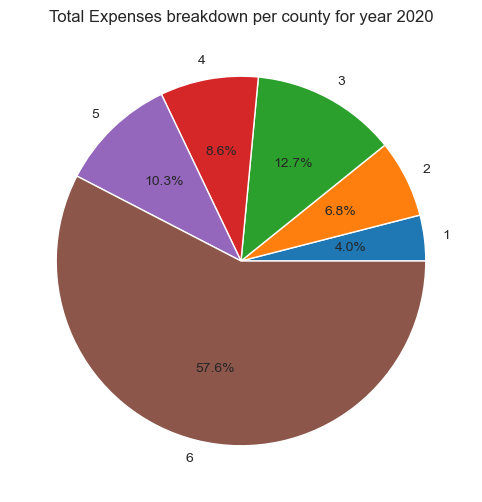

In [156]:
pie_feature_breakdown_pie_over_pop_size_over_years(df=binned_df, feature="Total Expenses")

## Grouped by Population Size over years

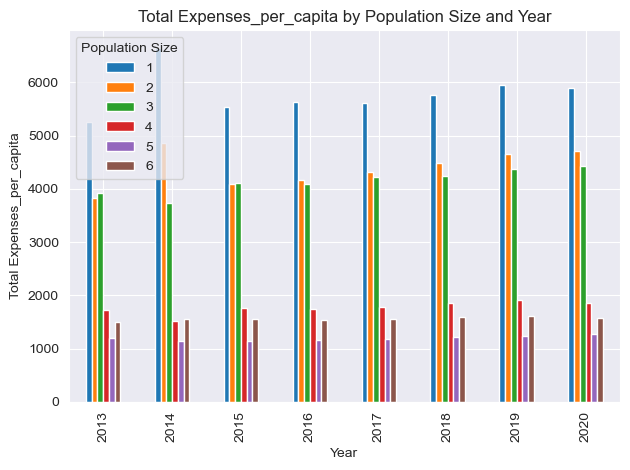

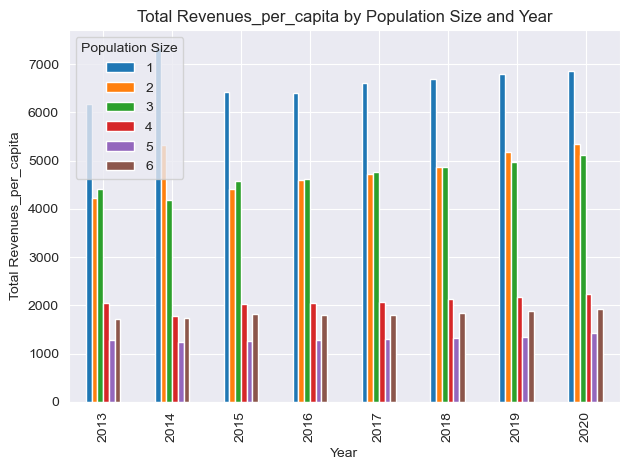

In [157]:
vis_against_population_size_over_years(df=binned_df, feature="Total Expenses_per_capita")
vis_against_population_size_over_years(df=binned_df, feature="Total Revenues_per_capita")

## Grouped by years over Population Size

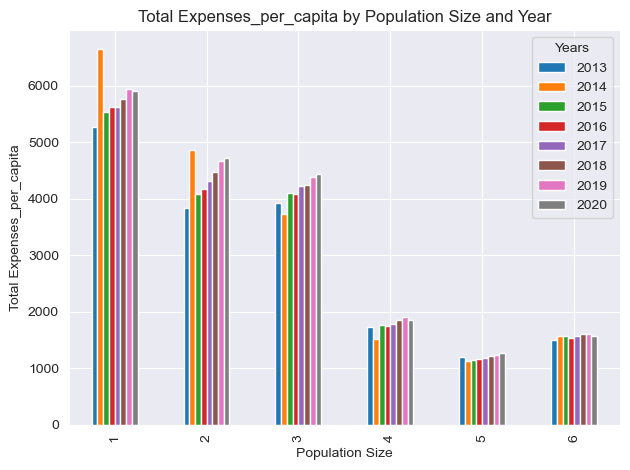

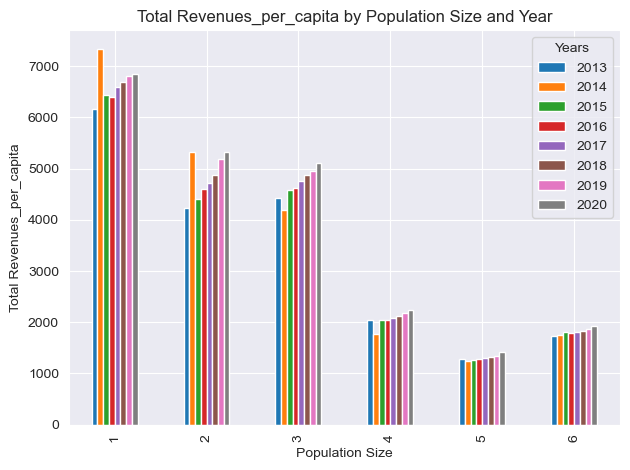

In [158]:
vis_against_years_over_population_size(df=binned_df, feature="Total Expenses_per_capita")
vis_against_years_over_population_size(df=binned_df, feature="Total Revenues_per_capita")

## Feature total over years

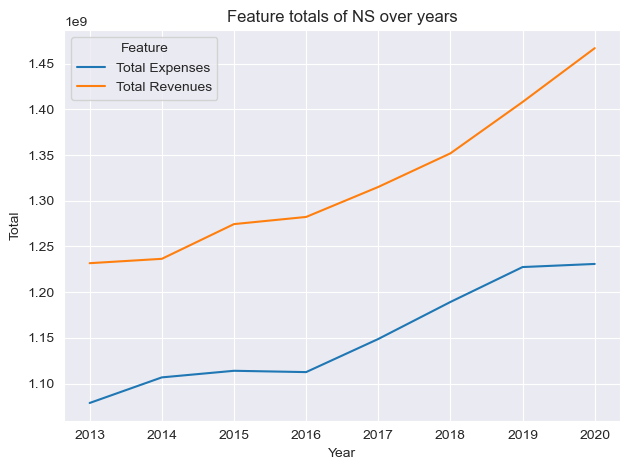

In [159]:
features_to_show = [
    "Total Expenses",
    "Total Revenues",
]

vis_feature_total_over_years(df=binned_df, features=features_to_show)

# X-Y Visualizations based on correlation 

## Total Revenues Per Capita vs Total Expenses Per Capita

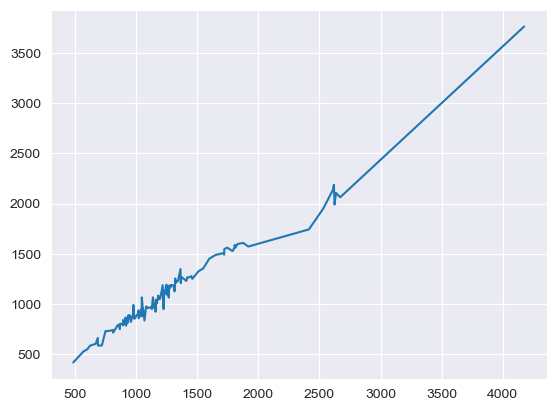

In [160]:
vis_feature_x_vs_feature_y(df=binned_df, feature_x="Total Revenues_per_capita", feature_y="Total Expenses_per_capita")